In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
ents = [0.0, 0.01, 0.05, 0.1, 0.4, 0.8]
clips = [0.005, 0.02, 0.08, 0.2, 0.5, 0.8, 1e6]

In [8]:
def plot_features(env_name, ents, clips, frac=0.1):
    with open(f"./shared/feature_matrix/{env_name}_actions.npy", 'rb') as f:
        actions = np.load(f)
    with open(f"./shared/feature_matrix/{env_name}_features.npy", 'rb') as f:
        features = np.load(f)
        
    assert len(actions.shape) == 4  # (n_seeds, n_ent, n_clip, batch_size)
    assert len(features.shape) == 5  # (n_seeds, n_ent, n_clip, batch_size, feature_dim)
    
    print("Actions shape:", actions.shape)
    print("Features shape:", features.shape)

    actions = actions[0]  # (n_ent, n_clip, batch_size)
    features = features[0]  # (n_ent, n_clip, batch_size, feature_dim)

    actions = actions[0, 0]
    features = features[0, 0]
    
    
#     print(actions)
    
    tsne = TSNE(n_components=2)
    
#     tsne = PCA(n_components=3)
    
    tsne_features = tsne.fit_transform(features)
    print(tsne_features.shape)
    
    
    sns.scatterplot(x=tsne_features[:, 0], y=tsne_features[:, 1], hue=actions)

In [12]:
def plot_svd(env_name, ents, clips, std_scale=0.1, y_maxr=None, y_maxp=None, tick=1, k=10):
    with open(f"./shared/feature_matrix/{env_name}_actions.npy", 'rb') as f:
        actions = np.load(f)
    with open(f"./shared/feature_matrix/{env_name}_features.npy", 'rb') as f:
        features = np.load(f)
        
    assert len(actions.shape) == 4  # (n_seeds, n_ent, n_clip, batch_size)
    assert len(features.shape) == 5  # (n_seeds, n_ent, n_clip, batch_size, feature_dim)
    print("Actions shape:", actions.shape)
    print("Features shape:", features.shape)

    
    sF = np.linalg.svd(features)[1]
    assert sF.shape[1:3] == (len(ents), len(clips))
    print("sF shape:", sF.shape)
    print("Max sF:", np.max(np.mean(sF, axis=0)))

    # Normalize
    sF /= np.max(sF, axis=-1, keepdims=True)
    
    sF = sF[..., :k]
    
    sF = np.mean(sF, axis=0)
    
    print("\nSingular values of feature matrix")
    plt.figure(figsize=(24, 15))
    indices = range(sF.shape[-1])
    for j in range(sF.shape[0]):
        plt.subplot(2, 3, j+1)
        for k in range(sF.shape[1]):
            sns.lineplot(x=indices, y=sF[j, k, :], label=f"eps={clips[k] if clips[k]<1000 else None}")
        
        plt.xlabel("Index")
        plt.ylabel("Singular value")
        plt.ylim(top=y_maxr)
        plt.title(f"Ent. bonus={ents[j]}")
    plt.show()
        
    return sF

## 1. Acrobot

(8, 6, 7, 512) (8, 6, 7, 512, 64)
Actions shape: (8, 6, 7, 512)
Features shape: (8, 6, 7, 512, 64)
(512, 2)


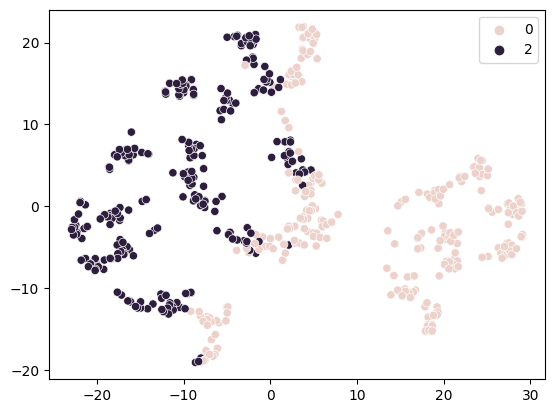

In [9]:
plot_features("Acrobot-v1", ents, clips)

Actions shape: (8, 6, 7, 512)
Features shape: (8, 6, 7, 512, 64)
sF shape: (8, 6, 7, 64)
Max sF: 1140.5305083549383

Singular values of feature matrix


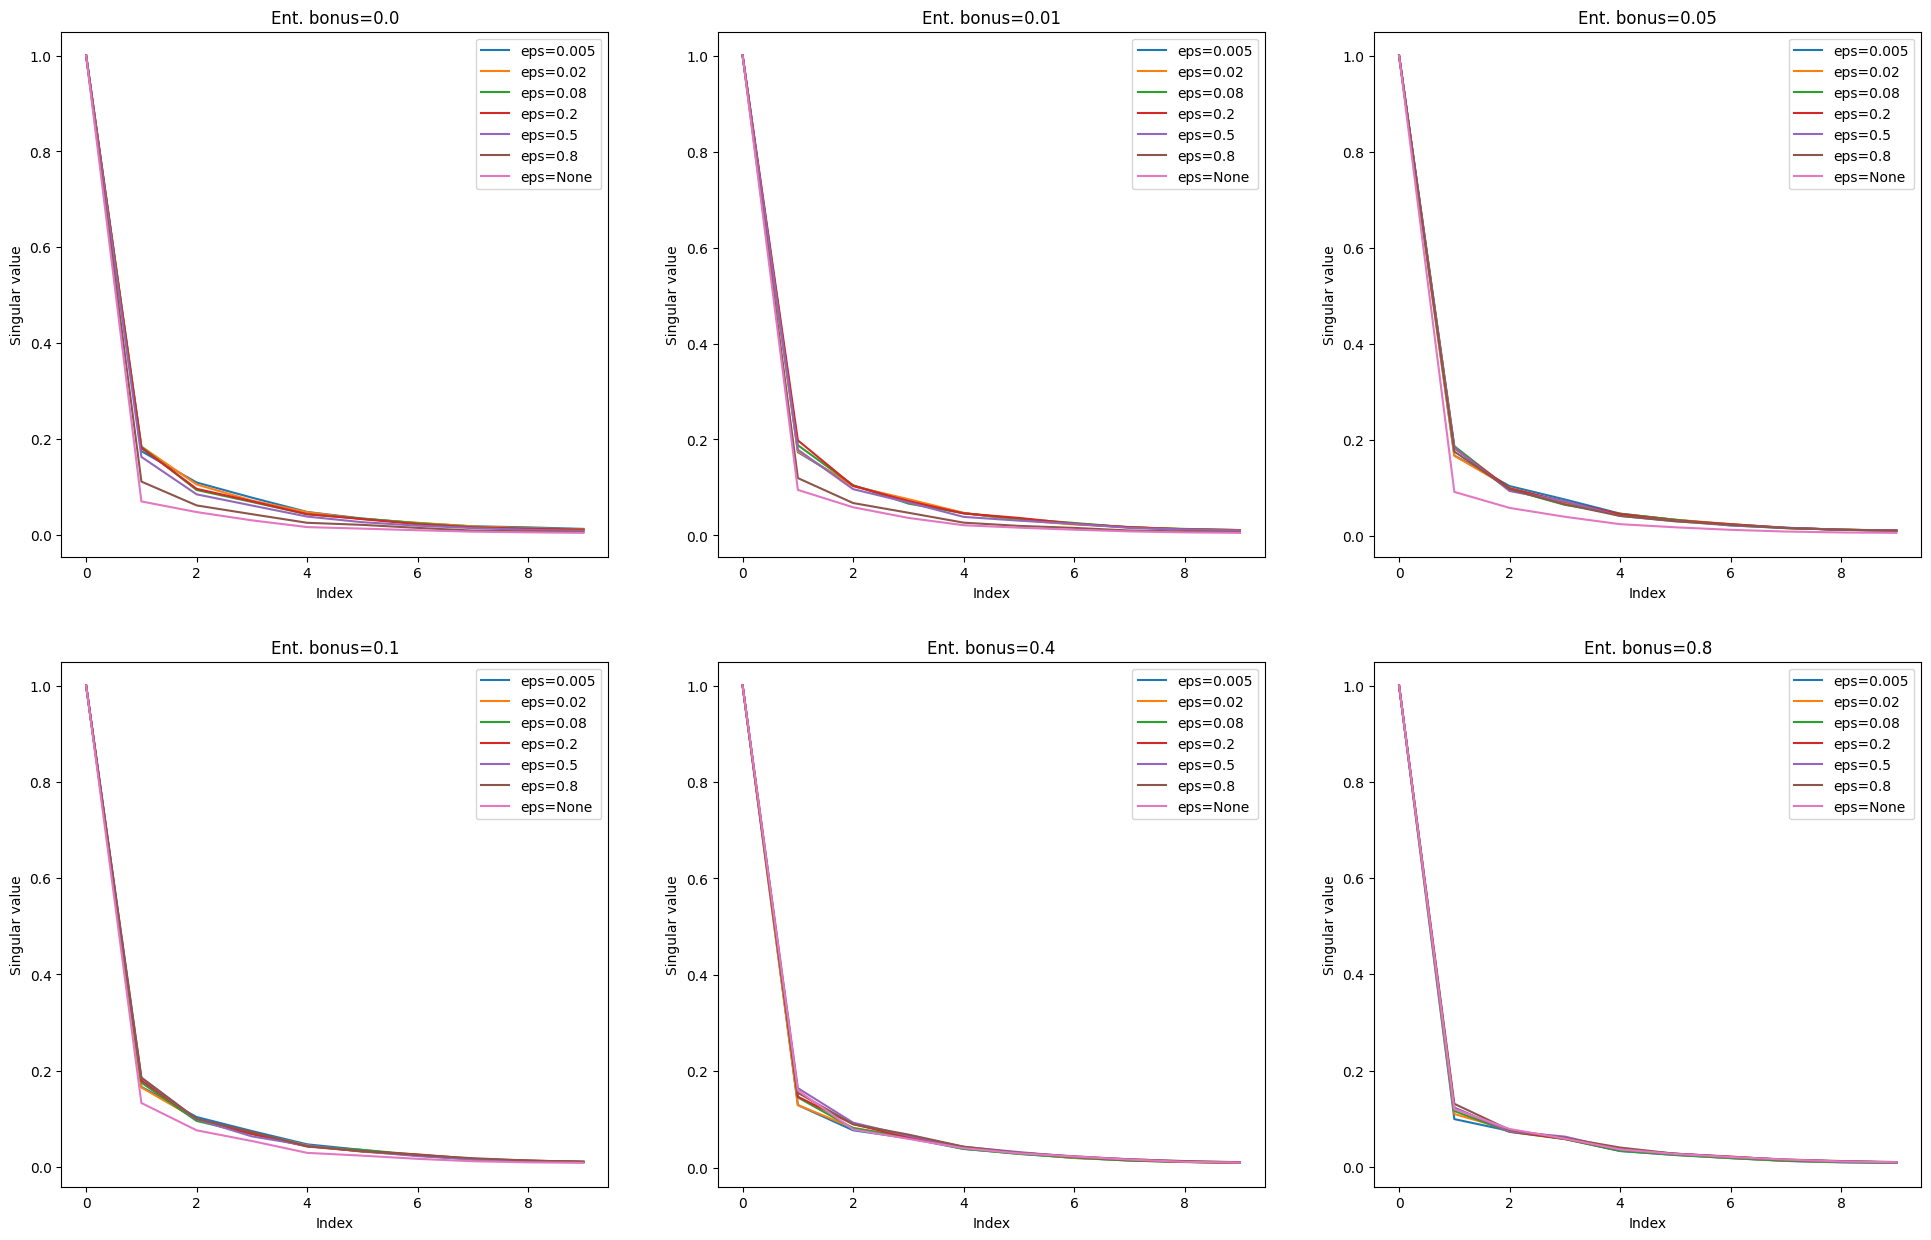

In [13]:
sF = plot_svd("Acrobot-v1", ents, clips)

## 2. Asterix

(8, 6, 7, 8192) (8, 6, 7, 8192, 256)
Actions shape: (8, 6, 7, 8192)
Features shape: (8, 6, 7, 8192, 256)
(8192, 2)


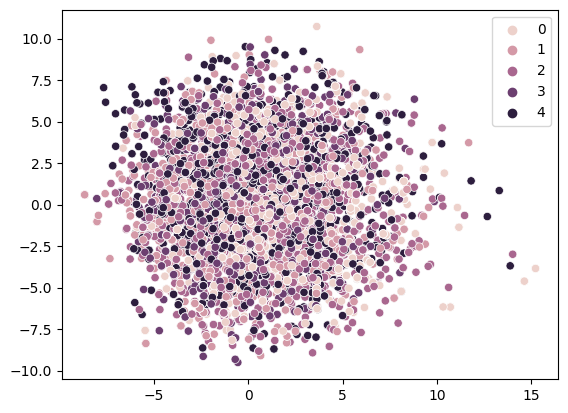

In [15]:
plot_features("Asterix-MinAtar", ents, clips)

In [14]:
sF = plot_svd("Asterix-MinAtar", ents, clips)

Actions shape: (8, 6, 7, 8192)
Features shape: (8, 6, 7, 8192, 256)


MemoryError: Unable to allocate 168. GiB for an array with shape (8, 6, 7, 8192, 8192) and data type float64

## 3. Breakout

(8, 6, 7, 8192) (8, 6, 7, 8192, 256)
Actions shape: (8, 6, 7, 8192)
Features shape: (8, 6, 7, 8192, 256)
(8192, 2)


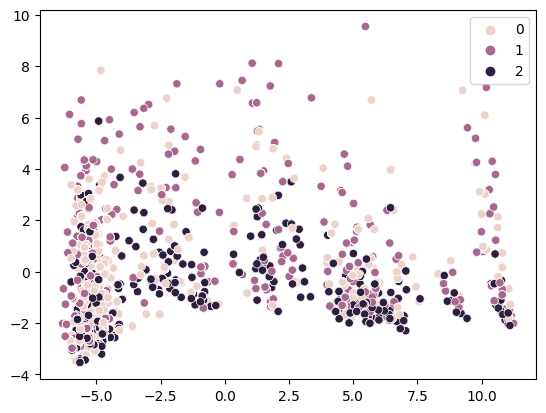

In [16]:
plot_features("Breakout-MinAtar", ents, clips)

In [ ]:
sF = plot_svd("Breakout-MinAtar", ents, clips)

## 4. CartPole

(8, 6, 7, 256) (8, 6, 7, 256, 64)
Actions shape: (8, 6, 7, 256)
Features shape: (8, 6, 7, 256, 64)
(256, 2)


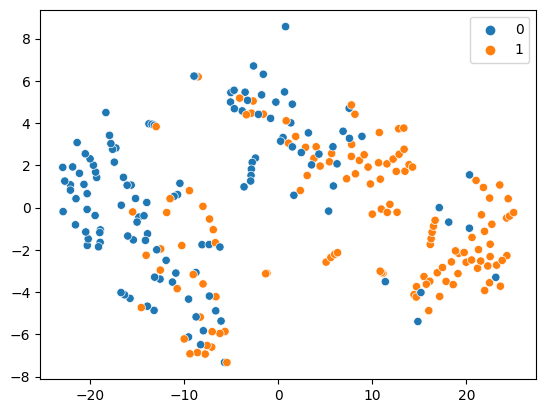

In [27]:
plot_features("CartPole-v1", ents, clips)

In [ ]:
sF = plot_svd("CartPole-v1", ents, clips)

## 5. Freeway

(8, 6, 7, 8192) (8, 6, 7, 8192, 256)
Actions shape: (8, 6, 7, 8192)
Features shape: (8, 6, 7, 8192, 256)
(8192, 2)


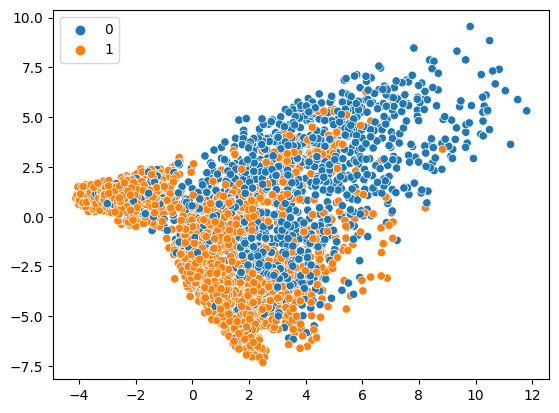

In [18]:
plot_features("Freeway-MinAtar", ents, clips)

In [ ]:
sF = plot_svd("Freeway-MinAtar", ents, clips)

## 6. MountainCar

(8, 6, 7, 512) (8, 6, 7, 512, 64)
Actions shape: (8, 6, 7, 512)
Features shape: (8, 6, 7, 512, 64)
(512, 2)


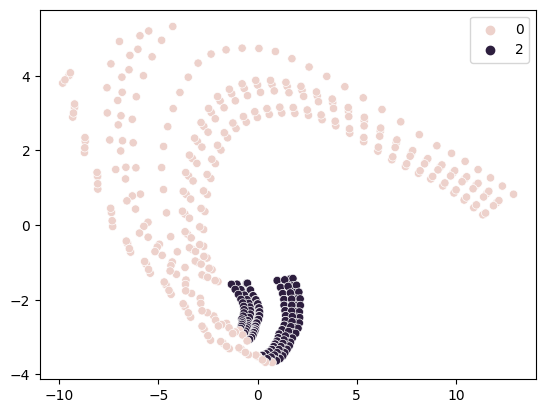

In [19]:
plot_features("MountainCar-v0", ents, clips)

Actions shape: (8, 6, 7, 512)
Features shape: (8, 6, 7, 512, 64)
sF shape: (8, 6, 7, 64)
Max sF: 870.8311959321327

Singular values of feature matrix


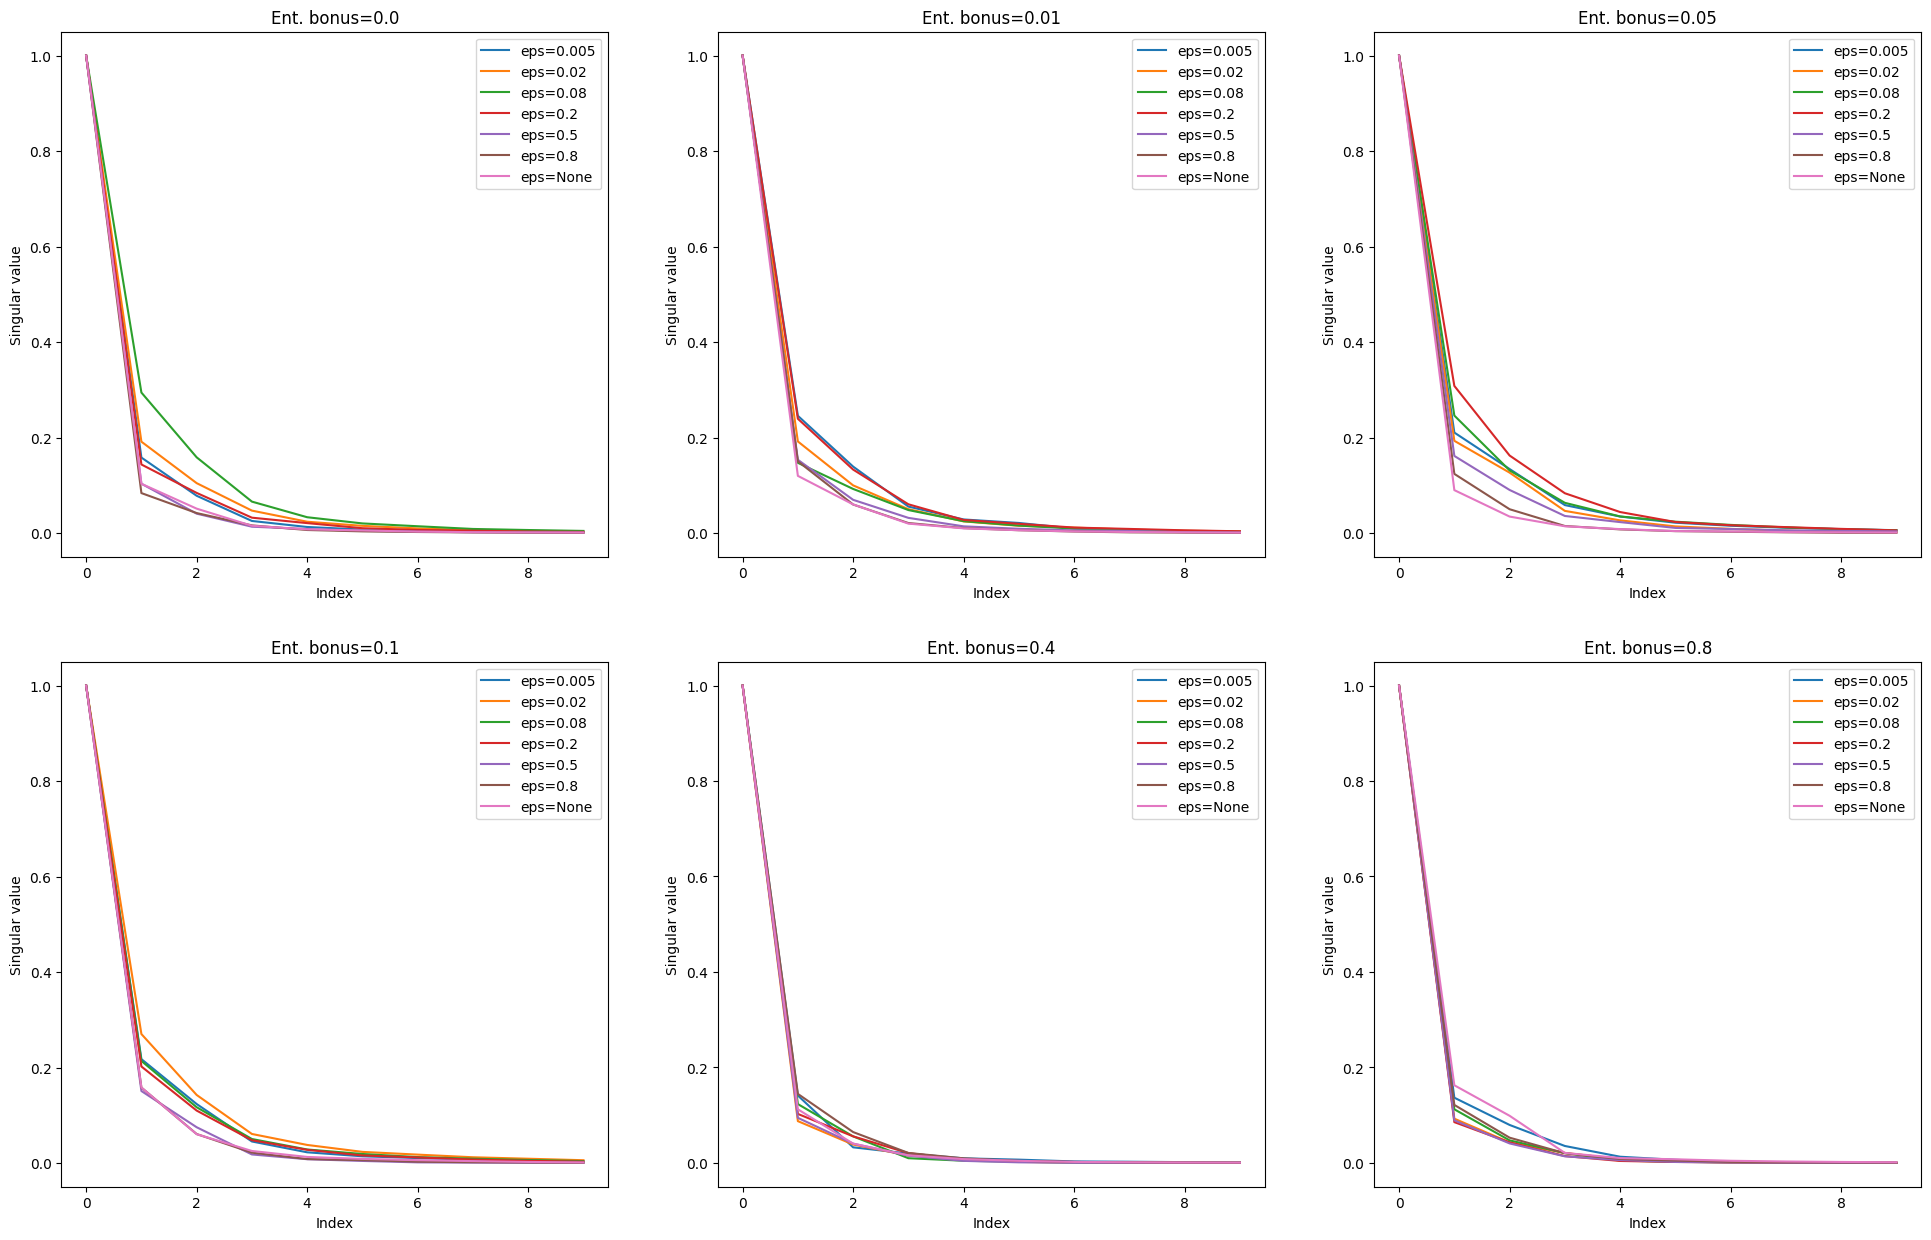

In [15]:
sF = plot_svd("MountainCar-v0", ents, clips)

## 7. SpaceInvaders

(8, 6, 7, 8192) (8, 6, 7, 8192, 256)
Actions shape: (8, 6, 7, 8192)
Features shape: (8, 6, 7, 8192, 256)
(8192, 2)


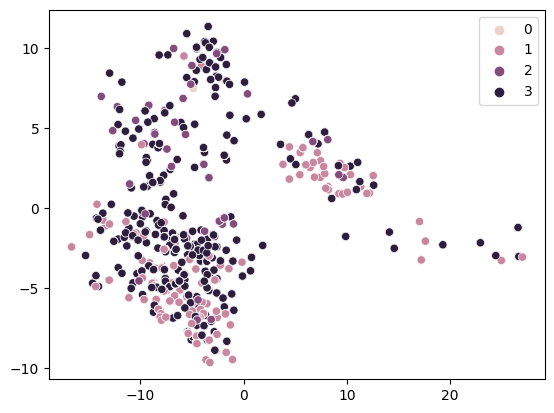

In [20]:
plot_features("SpaceInvaders-MinAtar", ents, clips)

In [16]:
sF = plot_svd("SpaceInvaders-MinAtar", ents, clips)

Actions shape: (8, 6, 7, 8192)
Features shape: (8, 6, 7, 8192, 256)


MemoryError: Unable to allocate 168. GiB for an array with shape (8, 6, 7, 8192, 8192) and data type float64